# MAT 388E, Lecture 13

# Dimensional Reduction 

In many cases, the data we are going to work with are going to be high dimensional. Since humans are visually inclined, we would like to look at the data to make some deductions. But since we cannot visualize a high number of dimensions, we must find ways to project point clouds in high dimensional spaces into spaces of lower dimension. For this purpose, today we are going to look at 3 methods.

## The latent space

A latent space is a lower-dimensional space that represents the original data in a compressed form. The term *latent* refers to the fact that the dimensions in the latent space are not directly observed in the original data, but rather are inferred from the patterns and relationships present in the data.

Latent spaces are commonly used in machine learning and statistical analysis to represent high-dimensional data in a more manageable form. Dimensional reduction algorithms such as PCA, LDA, and t-SNE can be used to transform the original data into a latent space, where the dimensions of the space are chosen to capture the most important or relevant information contained in the data.

Latent spaces are useful for a variety of purposes, including data visualization, feature extraction, and dimensionality reduction. In data visualization, the latent space can be used to plot the data in a lower-dimensional space, making it easier to visualize and understand the underlying patterns and relationships in the data. In feature extraction, the latent space can be used to identify the most important or relevant features in the data, which can be used to train a machine learning model or to select a subset of features for further analysis. In dimensionality reduction, the latent space can be used to compress the data, reducing the number of dimensions while still retaining most of the original information.

## All possible projections

The simplest way of projecting a high dimensional dataset onto a 2-dimensional space (a latent space of dimension 2) is selecting any 2 dimensions. However, this approach is blind to the labels we might have for the data points. In most cases, we want to project the data in such a way that we separate different labeled points from each other as best as we can, while we keep points sharing the same label as close as we can.

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

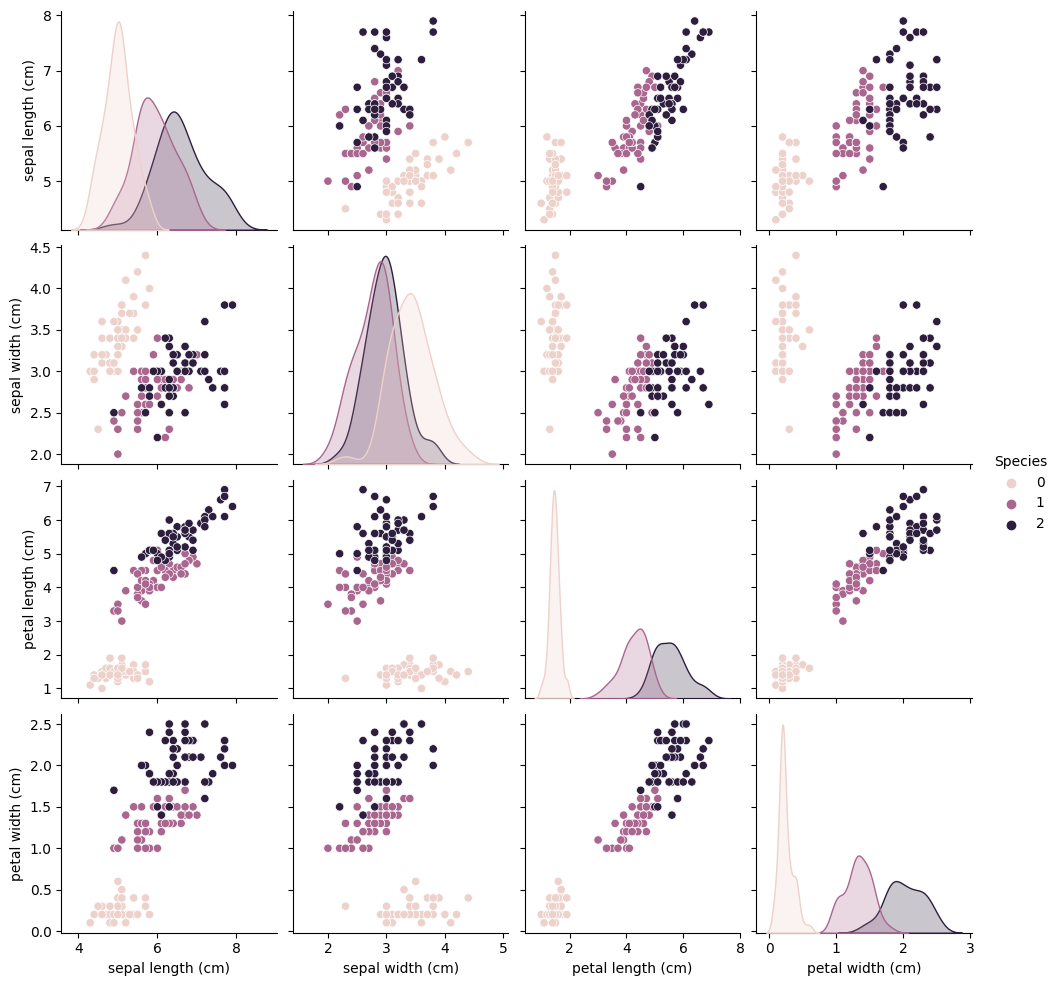

In [12]:
iris = load_iris()
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['Species'] = iris['target']
sns.pairplot(df,hue='Species')

## Principal Component Analysis (PCA)

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a widely used dimensional reduction technique in machine learning and statistical analysis. It is another method that is blind to any possible labels the points we have in our dataset. However, instead of simply projecting data randomly on any two selected axes, PCA finds a projection in such a way that it preserves the variation in the data. PCA is a linear transformation method that projects a set of possibly correlated variables onto a smaller set of uncorrelated variables called principal components (PCs). These PCs are ranked in order of importance, with the first PC having the highest explained variance, and the subsequent PCs having lower explained variances. 

(Image source: [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis))

![Gaussian Scatter PCA](./images/pca.png)

The main goal of PCA is to transform the original set of variables into a new set of linearly uncorrelated variables, called principal components, which capture the most important information contained in the original set of variables. These principal components can then be used to represent the original data in a lower-dimensional space, while still retaining most of the original information.

PCA works by finding the directions in the data that have the highest variance and projecting the data onto these directions. The first principal component is the direction in the data that has the highest variance, and each subsequent principal component is the direction that has the highest variance while being orthogonal to the previous principal components.

PCA can be used for a variety of purposes, including data visualization, noise reduction, and feature extraction. In data visualization, PCA can be used to reduce the number of dimensions in a dataset to a more manageable number, allowing the data to be plotted in a lower-dimensional space. In noise reduction, PCA can be used to remove noise from a dataset by projecting the data onto a lower-dimensional space that does not contain the noise. In feature extraction, PCA can be used to identify the most important features in a dataset, which can be used to train a machine learning model or to select a subset of features for further analysis.

PCA can be implemented using [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) or [eigenvalue decomposition (EVD)](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix). The choice of implementation depends on the size and structure of the data, as well as the computational resources available.

<AxesSubplot: >

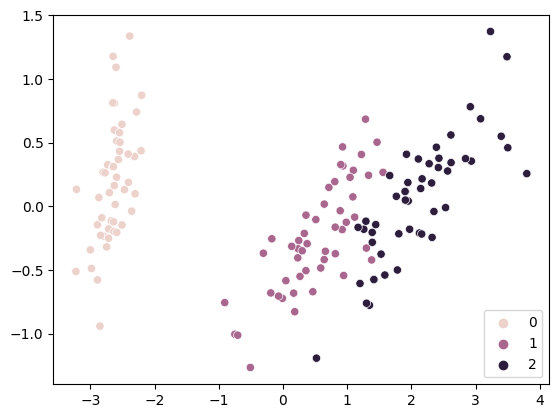

In [18]:
from sklearn.decomposition import PCA

projector = PCA(n_components=2)
X = projector.fit_transform(iris['data'])

sns.scatterplot(x=X[:,0],y=X[:,1],hue=iris['target'])

## Linear Discriminant Analysis (LDA)

[Linear Discriminant Analysis (LDA)](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) is another dimensional reduction technique that is commonly used in machine learning and statistical analysis. Like PCA, LDA is a linear transformation method that projects a set of variables onto a lower-dimensional space. However, unlike PCA, which seeks to find the directions in the data that have the highest variance, LDA seeks to find the directions that maximize the separation between different classes or categories in the data.

LDA is used for classification tasks, where the goal is to predict the class or category of a given data point based on a set of features. LDA works by finding a linear combination of the features that best separates the different classes. It does this by maximizing the between-class variance and minimizing the within-class variance. The resulting linear combination of features is called a discriminant, and the resulting transformed space is called the discriminant space.

In terms of similarities, both LDA and PCA are linear transformation methods that project a set of variables onto a lower-dimensional space. Both methods also involve finding the directions in the data that have the highest importance or variance, and both methods can be used for data visualization and feature extraction.

The main difference between LDA and PCA is that LDA is a supervised algorithm, while PCA is an unsupervised algorithm. This means that LDA uses the class labels of the data to find the discriminants, while PCA does not use class labels and simply looks for the directions in the data that have the highest variance. This difference in the objective function leads to different results when the two methods are applied to the same data.

One important thing to note is that LDA assumes that the data follows a Gaussian distribution and that the classes have equal covariances. If these assumptions are not met, LDA may not perform well and other methods, such as Quadratic Discriminant Analysis (QDA) or Regularized Discriminant Analysis (RDA), may be more appropriate.

Below, I am going to outline mathematical details of the LDA algorithm with 2 class labels. Assume we have data points embedded in a high dimensional space with two labels: 0 and 1. Let $C_0$ and $C_1$ be the set of points (that viewed as a matrix) has the labels 0 and 1 respectively.

Then if we consider the class means
$$ \mu_i = \frac{1}{|C_i|}\sum_{x\in C_i} x $$
and class covariances
$$ \Sigma_i = \sum_{x\in C_i} (x-\mu_i)^t(x-\mu_i) $$
Now, let $P\colon \mathbb{R}^n\to \mathbb{R}^m$ be a projection matrix. Then we have
$$ S_P = \frac{\sigma^2_\text{between}(P)}{\sigma^2_\text{within}(P)} = \frac{\|P(\mu_0-\mu_1)\|}{\|P(\Sigma_0+\Sigma_1)\|} $$
In other words, we must find a $P$ that maximizes $S_P$.

<AxesSubplot: >

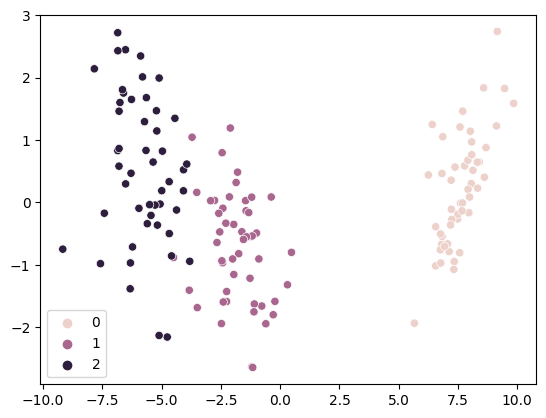

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

projector = LDA()
X = projector.fit_transform(iris['data'],iris['target'])

sns.scatterplot(x=X[:,0], y=X[:,1], hue=iris['target'])

## t-Distributed Stochastic Neighbor Embedding (TSNE)

[t-distributed stochastic neighbor embedding (TSNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a relatively new non-linear dimensional reduction technique for projecting data into a lower dimensional space $x^{(i)}\mapsto y^{(i)}$ using a distance measure called [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) commonly used for comparing distributions. It works by transforming the data into a lower-dimensional space in a way that preserves the local structure of the data, meaning that similar data points in the original space are also similar in the lower-dimensional space.

t-SNE works by constructing a probability distribution over pairs of data points in the original space, where the probability that a pair of points is chosen is based on their similarity. The similarity between points is measured using a metric called the joint probability, which is the product of the probabilities that each point is chosen independently. The joint probability can be computed using the Gaussian kernel, which measures the similarity between points based on their Euclidean distance. First we calculate
$$ p_{j|i} = \frac{e^{-\|x^{(i)}-x^{(j)}\|}}{\sum_{i\neq k} e^{-\|x^{(i)}-x^{(k)}\|}} $$
and let
$$ p_{ij} = \frac{p_{j|i}+p_{i|j}}{N} $$
We want a mapping $x^{(i)}\mapsto y^{(i)}$ such that the probability distribution $p_{ij}$ and the $q_{ij}$
$$ q_{ij} = \frac{(1+\|y^{(i)}-y^{(j)}\|^2)^{-1}}{\sum_k \sum_{\ell\neq k} (1+\|y^{(k)}-y^{(\ell)}\|^2)^{-1}} $$
have minimal KL-divergence
$$ KL(P|Q) = \sum_{i\neq j} p_{ij} \log (p_{ij}/q_{ij}) $$

Once the joint probabilities have been computed, t-SNE seeks to find a lower-dimensional representation of the data that preserves the pairwise similarities as much as possible. This is done by constructing a similar probability distribution over pairs of data points in the lower-dimensional space and minimizing the difference between the two distributions using a cost function called the Kullback-Leibler divergence.

One of the main differences between t-SNE and other dimensional reduction techniques such as PCA and LDA is that t-SNE is a non-linear method, while PCA and LDA are linear methods. This means that t-SNE is able to capture more complex relationships in the data, but it can also be more sensitive to the initial conditions and may require more tuning to get good results.

Another difference is that t-SNE is primarily used for visualization, while PCA and LDA can be used for a variety of purposes, including data visualization, noise reduction, and feature extraction. However, t-SNE can also be used for feature extraction, as the lower-dimensional representation of the data can be used as input to a machine learning model.

One thing to note is that t-SNE can be computationally intensive, particularly for large datasets, and it can be sensitive to the choice of parameters. It is also not a good choice for large-scale data analysis, as it does not scale well to very large datasets.



/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

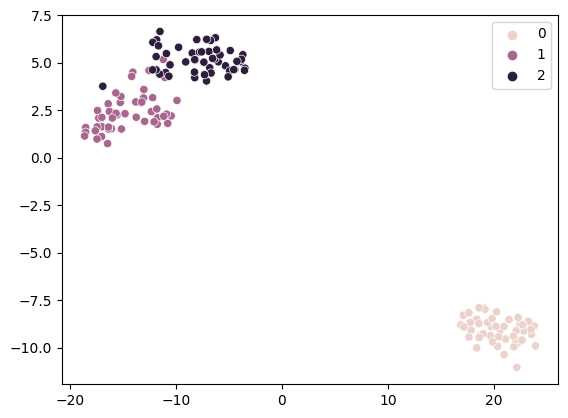

In [30]:
from sklearn.manifold import TSNE

projector = TSNE(n_components=2)
X = projector.fit_transform(iris['data'],y=iris['target'])

sns.scatterplot(x=X[:,0],y=X[:,1],hue=iris['target'])

## Non-negative matrix factorization

[Non-Negative Matrix Factorization (NMF)](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is a dimensional reduction technique that decomposes a given matrix into the product of two non-negative matrices. It is a linear method that is commonly used for decomposing a matrix into its underlying components, which are often referred to as *features*. NMF works by minimizing the difference between the original matrix and the product of the two non-negative matrices. This is typically done using an iterative optimization algorithm, such as multiplicative update or alternating least squares.

NMF has a number of applications, including topic modeling, image decomposition, and feature extraction. It is particularly well-suited for data that is composed of a mixture of different patterns or features, such as text data, images, and audio data. However, it may not be as effective for data that does not have a clear underlying structure or that is not well-represented by a linear model.

<AxesSubplot: >

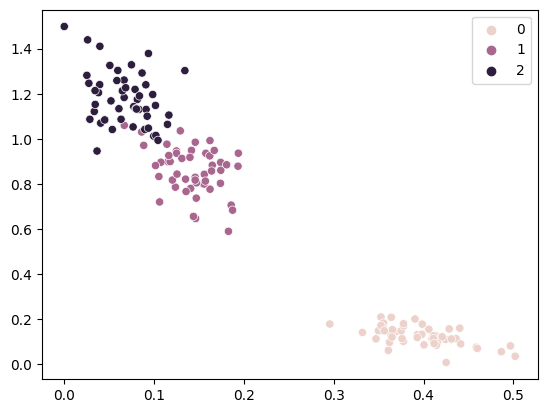

In [36]:
from sklearn.decomposition import NMF

decomposer = NMF(n_components=2, max_iter=1000)
X = decomposer.fit_transform(iris['data'])

sns.scatterplot(x=X[:,0],y=X[:,1],hue=iris['target'])

## Auto-encoders

[Autoencoders](https://en.wikipedia.org/wiki/Autoencoder) are a type of neural network that are commonly used for dimensionality reduction and feature learning. An autoencoder consists of two parts: an encoder and a decoder. The encoder maps the input data to a lower-dimensional latent space, called the bottleneck or latent representation, and the decoder maps the latent representation back to the original space.

The goal of an autoencoder is to learn a compact representation of the input data in the latent space, such that the reconstruction error between the input data and the reconstructed data is minimized. This is done by training the autoencoder to reconstruct the input data from the latent representation using an optimization algorithm, such as stochastic gradient descent.

(Image Source: [Wikipedia](https://commons.wikimedia.org/w/index.php?curid=80177333), Image by By Michela Massi.)

![Autoencoders](./images/autoencoders_scaled.png)

Autoencoders can be either linear or non-linear, depending on the type of activation function used in the encoder and decoder. Linear autoencoders are suitable for data that is well-represented by a linear model, while non-linear autoencoders are better suited for data that exhibits non-linear relationships.

One of the main advantages of autoencoders is that they are flexible and can be adapted to a wide range of data types and structures. They can be trained on a variety of tasks, including dimensionality reduction, feature learning, and denoising. One thing to note is that autoencoders can be sensitive to the choice of hyperparameters, such as the size of the latent space, the learning rate, and the type of optimization algorithm used. It is important to carefully tune these hyperparameters to get good results with autoencoders.

### Types of auto-encoders

There are several different types of autoencoders, each with its own characteristics and applications. Here are a few common types:

* Standard Autoencoder: This is the most basic type of autoencoder, which consists of a single encoder and decoder network. It is trained to reconstruct the input data from the latent representation using an optimization algorithm such as stochastic gradient descent.

* Denoising Autoencoder: This type of autoencoder is designed to remove noise from the input data by learning to reconstruct the clean version of the data from a noisy version. It is trained to minimize the reconstruction error between the clean version of the data and the reconstructed version.

* Variational Autoencoder (VAE): This type of autoencoder is a generative model that can be used to learn a distribution over the input data. It consists of an encoder network that maps the input data to a latent space and a decoder network that generates samples from the latent space. VAEs are trained to minimize the difference between the distribution of the input data and the distribution of the generated samples.

* Sparse Autoencoder: This type of autoencoder is specifically designed so that latent space representation of data points is *sparse*, i.e. coordinates of the image points in the latent space are mostly zero. Sparsity might be useful in certain machine learning algorithms such as classification and clustering.

* Convolutional Autoencoder: This type of autoencoder is specifically designed for processing image data. It consists of a series of convolutional layers in the encoder and decoder networks, which are trained to extract features from the input image and reconstruct the image from the latent representation.

* Recurrent Autoencoder: This type of autoencoder is specifically designed for processing sequential data, such as time series data or text data. It consists of a recurrent neural network in the encoder and decoder networks, which are trained to capture the dependencies between the input data and reconstruct the input sequence from the latent representation.

## An implementation of a standard auto-encoder

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [696]:
class Autoencoder(Model):
    def __init__(self, dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
                          layers.InputLayer(input_shape=(dim)),
                          layers.Dense(latent_dim, activation='sigmoid'),
                        ])
        self.decoder = tf.keras.Sequential([
                          layers.InputLayer(input_shape=(latent_dim)),
                          layers.Dense(dim, activation='relu')
                        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Epoch 1/20
5/5 [==============================] - 0s 1ms/step - loss: 15.3654
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 15.3417
Epoch 3/20
5/5 [==============================] - 0s 1ms/step - loss: 15.3191
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 15.2960
Epoch 5/20
5/5 [==============================] - 0s 1ms/step - loss: 15.2741
Epoch 6/20
5/5 [==============================] - 0s 1ms/step - loss: 15.2530
Epoch 7/20
5/5 [==============================] - 0s 1ms/step - loss: 15.2326
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 15.2123
Epoch 9/20
5/5 [==============================] - 0s 1ms/step - loss: 15.1924
Epoch 10/20
5/5 [==============================] - 0s 1ms/step - loss: 15.1726
Epoch 11/20
5/5 [==============================] - 0s 1ms/step - loss: 15.1530
Epoch 12/20
5/5 [==============================] - 0s 2ms/step - loss: 15.1334
Epoch 13/20
5/5 [==============================] - 0s 1ms/ste

<AxesSubplot: >

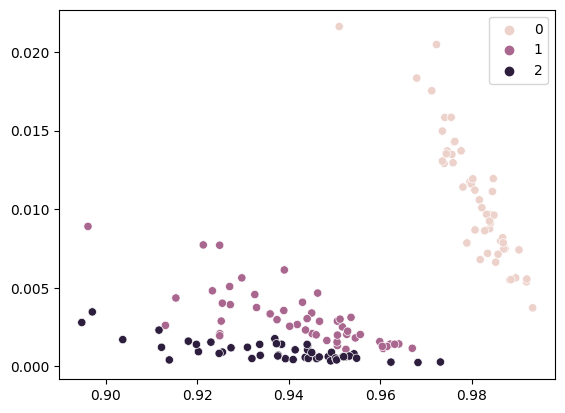

In [162]:
autoencoder = Autoencoder(4,2)
autoencoder.compile(optimizer='adamax', loss=losses.MeanSquaredError())
autoencoder.fit(iris['data'],iris['data'],epochs=20)

X = autoencoder.encoder.predict(iris['data'])
sns.scatterplot(x=X[:,0],y=X[:,1],hue=iris['target'])

## An auto-encoder for images

In [578]:
class ImageAutoencoder(Model):
    def __init__(self, dim, latent, activation='relu'):
        super(ImageAutoencoder, self).__init__()
        self.latent = latent
        self.dim = dim
        N = dim[0]*dim[1]
        self.encoder = tf.keras.Sequential([
                          layers.Flatten(),
                          layers.Dense(latent, activation='relu'),
                        ])
        self.decoder = tf.keras.Sequential([
                          layers.Dense(N, activation='relu'),
                          layers.Reshape(dim)
                        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Image auto-encoder tested on Olivetti Faces

In [1186]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
X = olivetti['data'].reshape((400,64,64))
y = olivetti['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [1187]:
autoencoder = ImageAutoencoder((64,64),64)
autoencoder.compile(optimizer='adamax', loss=losses.MeanSquaredLogarithmicError())

In [1206]:
autoencoder.fit(X_train,X_train,epochs=10,batch_size=10)

Epoch 1/10
30/30 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 8/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0151


In [1180]:
import matplotlib.pyplot as plt
from random import randint
from math import sqrt

def experiment(X_test):
    encoded_imgs = autoencoder.encoder(X_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

    sh = int(sqrt(encoded_imgs.shape[1]))
    plt.figure(figsize=(20, 6))
    n = 10
    for i in range(n):
        m = randint(0,encoded_imgs.shape[0])
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[m])
        plt.title("original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(encoded_imgs[m].reshape((sh,sh)))
        plt.title("encoded")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(decoded_imgs[m])
        plt.title("reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

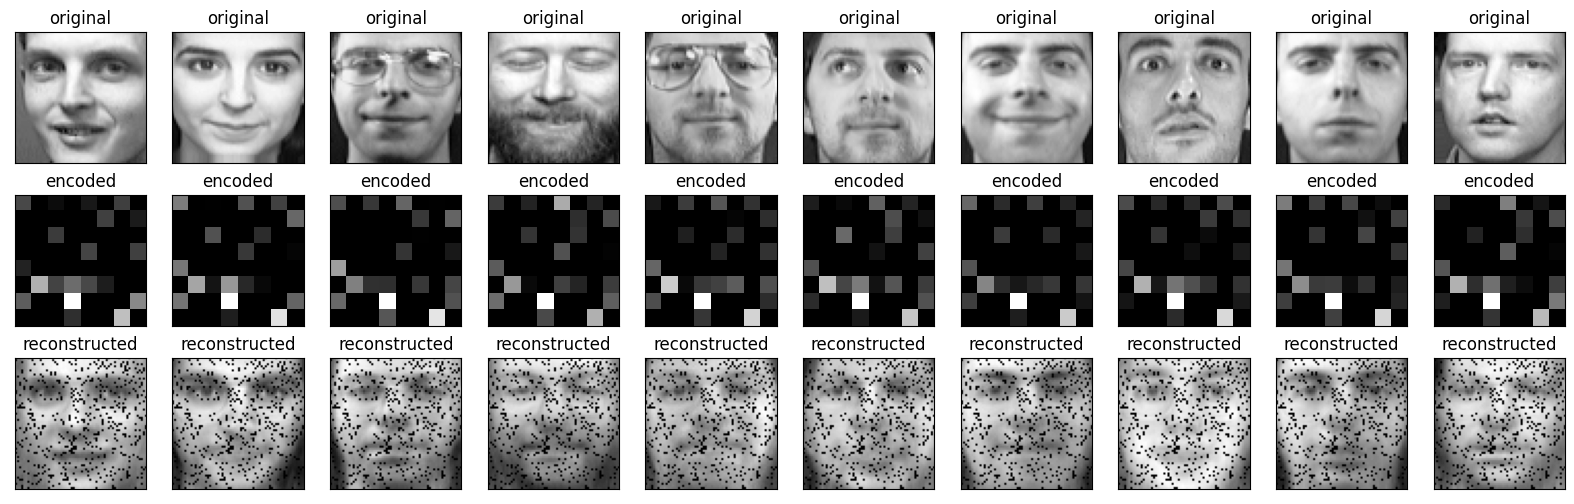

In [1181]:
experiment(X_test)

### Image auto-encoder tested on MNIST

In [1182]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [1183]:
autoencoder = ImageAutoencoder((28,28),49)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredLogarithmicError())

In [1184]:
autoencoder.fit(X_train,X_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 12s 2ms/step - loss: 1.0397
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8470
Epoch 3/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8268
Epoch 4/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8222
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8208
Epoch 6/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8166
Epoch 7/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8156
Epoch 8/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8161
Epoch 9/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8132
Epoch 10/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8135


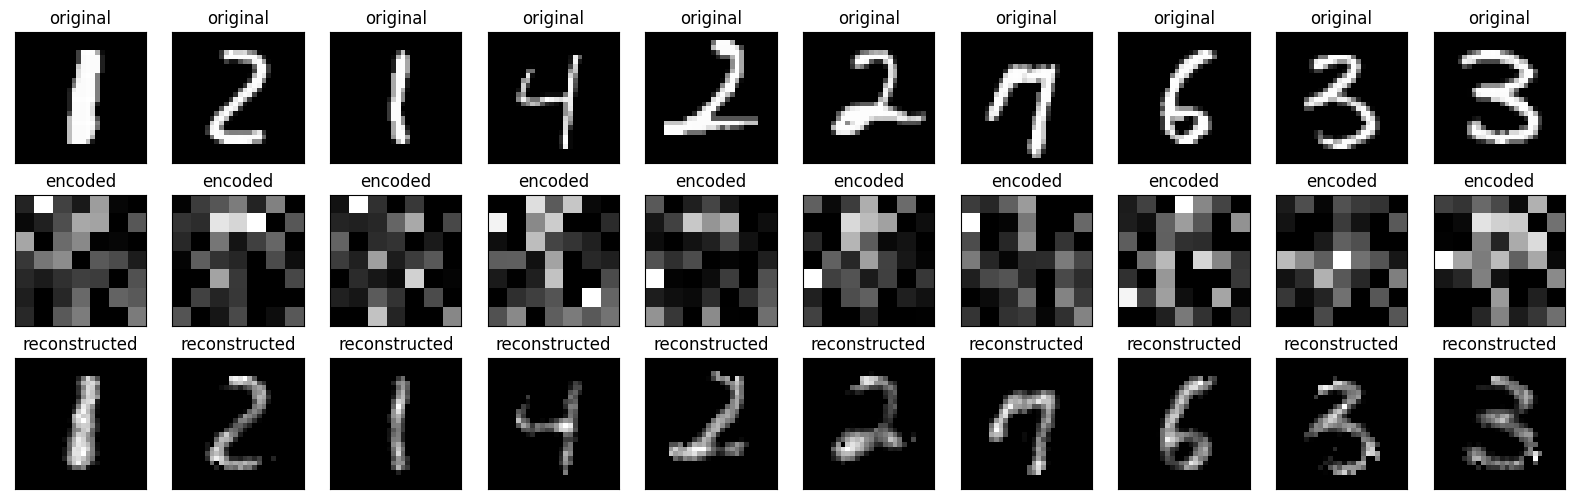

In [1185]:
experiment(X_test)

## An implementation of a denoising autoencoder

### Tested on MNIST

In [266]:
import tensorflow as tf
from tensorflow.random import normal

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

In [1067]:
X_train_noisy = tf.clip_by_value(X_train + noise_factor * normal(shape=X_train.shape), 
                                 clip_value_min=0., 
                                 clip_value_max=1.)
X_test_noisy = tf.clip_by_value(X_test + noise_factor * normal(shape=X_test.shape), 
                                clip_value_min=0., 
                                clip_value_max=1.)

X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [1070]:
autoencoder = ImageAutoencoder((28,28),49,activation='relu')
autoencoder.compile(optimizer='adamax', loss=losses.MeanSquaredLogarithmicError())

In [1071]:
autoencoder.fit(X_train,X_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 12s 2ms/step - loss: 1.5778
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 1.0995
Epoch 3/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.9927
Epoch 4/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.9441
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.9161
Epoch 6/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8985
Epoch 7/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8870
Epoch 8/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8784
Epoch 9/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8717
Epoch 10/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8666


In [1074]:
autoencoder.encoder(X_test).numpy().shape

(10000, 49)

In [1077]:
def experiment(X_test,X_test_noisy):
    encoded_imgs = autoencoder.encoder(X_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

    sh = int(math.sqrt(encoded_imgs.shape[1]))
    plt.figure(figsize=(20, 8))
    n = 10
    for i in range(n):
        m = randint(0,encoded_imgs.shape[0])
        ax = plt.subplot(4, n, i + 1)
        plt.imshow(X_test[m])
        plt.title("original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(4, n, i + 1 + n)
        plt.imshow(X_test_noisy[m])
        plt.title("noisy")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(4, n, i + 1 + 2*n)
        plt.imshow(encoded_imgs[m].reshape((sh,sh)))
        plt.title("encoded")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
        ax = plt.subplot(4, n, i + 1 + 3*n)
        plt.imshow(decoded_imgs[m])
        plt.title("reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

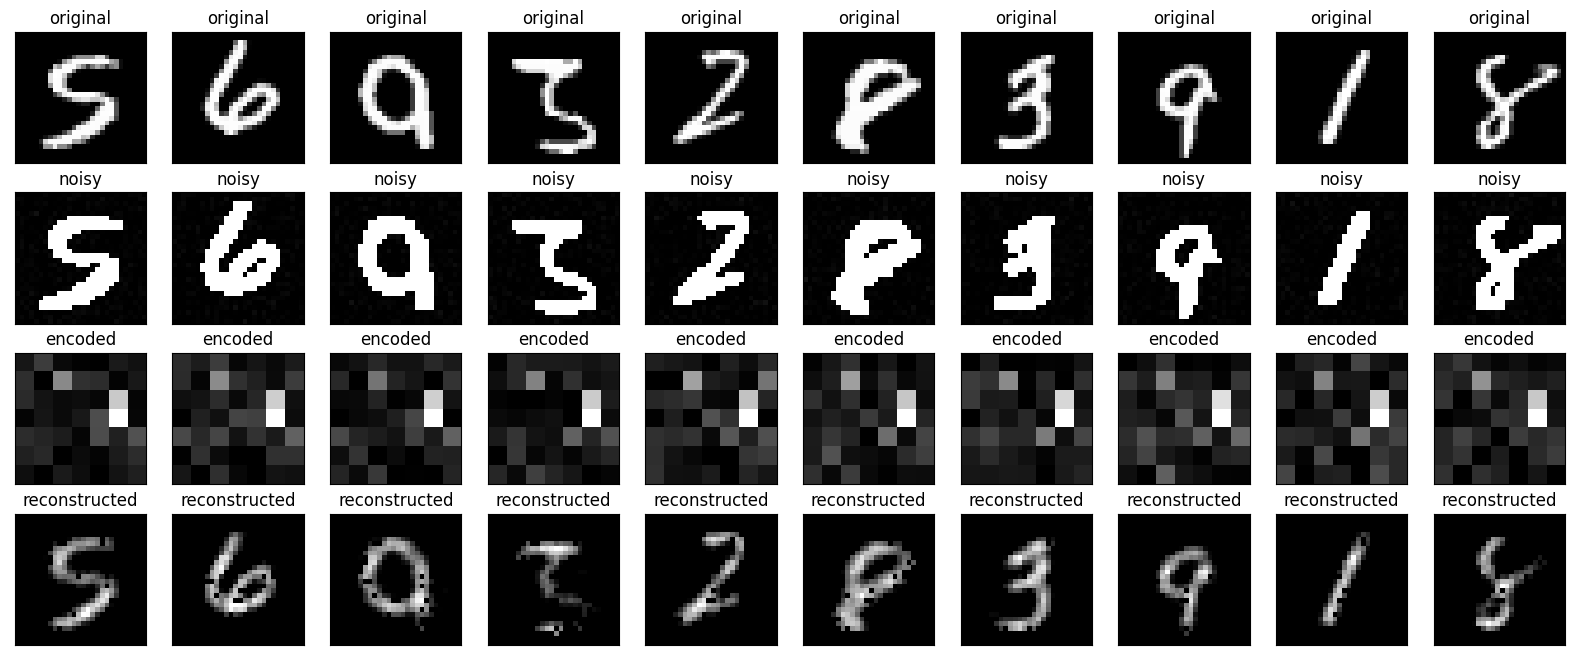

In [1078]:
experiment(X_test,X_test_noisy)

### Tested on Olivetti Faces Dataset

In [1079]:
X = olivetti['data'].reshape((400,64,64))
y = olivetti['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

noise_factor = 0.02
X_train_noisy = tf.clip_by_value(X_train + noise_factor * normal(shape=X_train.shape), 
                                 clip_value_min=0., 
                                 clip_value_max=1.)
X_test_noisy = tf.clip_by_value(X_test + noise_factor * normal(shape=X_test.shape), 
                                clip_value_min=0., 
                                clip_value_max=1.)

X_train.shape,X_test.shape

((300, 64, 64), (100, 64, 64))

In [1088]:
autoencoder = ImageAutoencoder((64,64),64,activation='relu')
autoencoder.compile(optimizer='adamax', loss=losses.MeanSquaredLogarithmicError())

In [1133]:
autoencoder.fit(X_train_noisy,X_train,epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0157
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0153
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0153


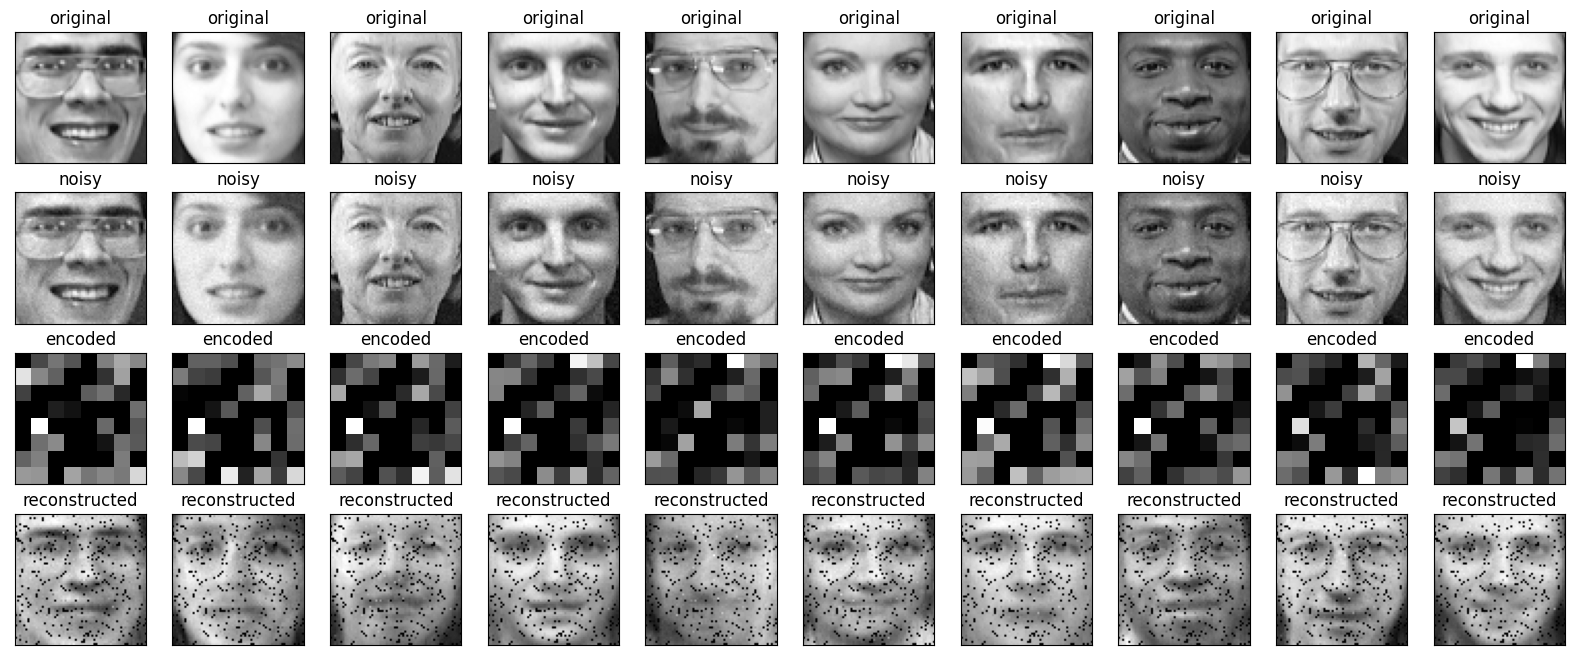

In [1135]:
experiment(X_test,X_test_noisy)

## A convolutional denoising auto-encoder



In [1136]:
class Denoise(Model):
    def __init__(self, dim, latent):
        super(Denoise, self).__init__()
        self.latent = latent
        self.dim = dim
        self.encoder = tf.keras.Sequential([
                          layers.Input(shape=dim),
                          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
                          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)
                        ])

        self.decoder = tf.keras.Sequential([
                          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [1139]:
autoencoder = ImageAutoencoder((64,64),64,activation='relu')
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredLogarithmicError())

In [1155]:
autoencoder.fit(X_train_noisy,X_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0349
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0349


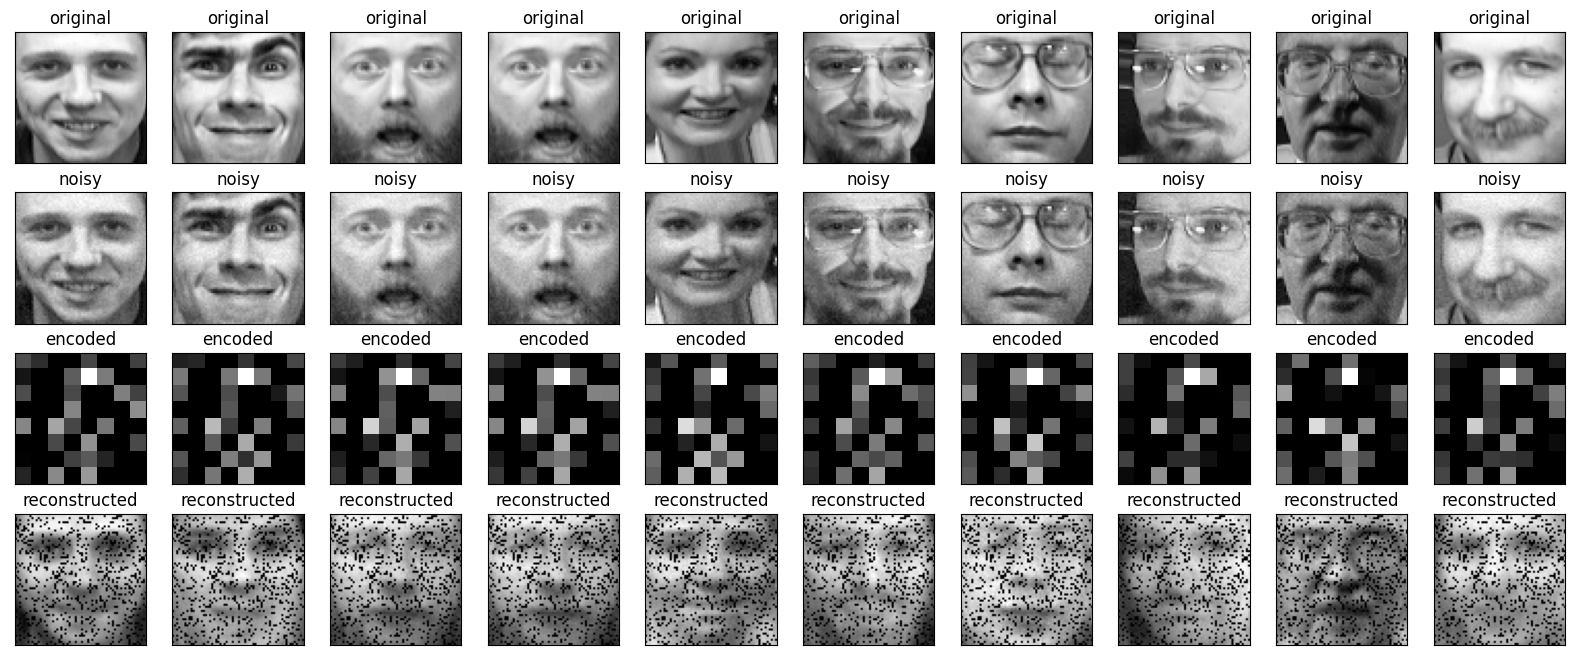

In [1156]:
experiment(X_test,X_test_noisy)